In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
cab = pd.read_csv('Datasets/Cab_Data.csv')
customer = pd.read_csv('Datasets/Customer_ID.csv')
transaction = pd.read_csv('Datasets/Transaction_ID.csv')
city = pd.read_csv('Datasets/City.csv')

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


## Data Merging
We are merging cab,transaction and customer in a single dataframe and keep city as a another dataframe.

In [7]:
tran_cust = pd.merge(customer,transaction, left_on = 'Customer ID', right_on= 'Customer ID')
main_df = pd.merge(tran_cust,cab, left_on='Transaction ID', right_on='Transaction ID')

In [8]:
main_df = round(main_df,2)
main_df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12


In [9]:
columns = main_df.columns.to_list()
columns

['Customer ID',
 'Gender',
 'Age',
 'Income (USD/Month)',
 'Transaction ID',
 'Payment_Mode',
 'Date of Travel',
 'Company',
 'City',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip']

In [10]:
main_df.rename(columns={'Date of Travel' : 'Date','Income (USD/Month)' :'Income'},inplace=True)
main_df.head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12


In [11]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


So, Now I have two Dataframes one containing all the information about Cab transactions and other is about Grographical information of the city.

## Prelimnary Data Analysis

In [12]:
print('The shape of Cab transaction dataframe is', main_df.shape )
print('The shape of Geographical information of city dataframe is', city.shape )

The shape of Cab transaction dataframe is (359392, 12)
The shape of Geographical information of city dataframe is (20, 3)


In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Customer ID     359392 non-null  int64  
 1   Gender          359392 non-null  object 
 2   Age             359392 non-null  int64  
 3   Income          359392 non-null  int64  
 4   Transaction ID  359392 non-null  int64  
 5   Payment_Mode    359392 non-null  object 
 6   Date            359392 non-null  object 
 7   Company         359392 non-null  object 
 8   City            359392 non-null  object 
 9   KM Travelled    359392 non-null  float64
 10  Price Charged   359392 non-null  float64
 11  Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


In [14]:
main_df.describe()

,Customer ID,Age,Income,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,22.567254,423.443311,286.190115
std,21012.412463,12.594234,7969.409482,1.268058e+05,12.233526,274.378911,157.993664
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.960000,583.660000,413.680000
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.030000,691.200000


In [15]:
main_df.isnull().sum()

Customer ID       0
Gender            0
Age               0
Income            0
Transaction ID    0
Payment_Mode      0
Date              0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [16]:
main_df.duplicated().sum()

0

In [17]:
main_df.nunique(axis=0)

Customer ID        46148
Gender                 2
Age                   48
Income             22725
Transaction ID    359392
Payment_Mode           2
Date                1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       14741
dtype: int64

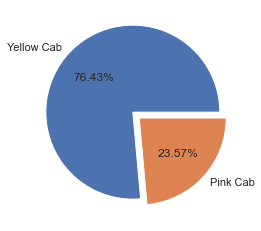

In [18]:
plt.pie(main_df['Company'].value_counts(),labels = main_df['Company'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

In [19]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [20]:
print(" Checking Null Vlaues for City")
print(city.isnull().sum())
print("\n\n Checking Duplicated Vlaues for City")
print(city.duplicated().sum())

 Checking Null Vlaues for City
City          0
Population    0
Users         0
dtype: int64


 Checking Duplicated Vlaues for City
0


In [21]:
city['Population'] = city.Population.str.replace(',', '').astype(int)
city['Users'] = city.Users.str.replace(',', '').astype(int)
city['percentage_user'] = round((city.Users/city.Population) * 100,2)

In [22]:
city.sort_values('percentage_user',ascending=False).head(10)

,City,Population,Users,percentage_user
14,SAN FRANCISCO CA,629591,213609,33.93
19,BOSTON MA,248968,80021,32.14
17,WASHINGTON DC,418859,127001,30.32
2,LOS ANGELES CA,1595037,144132,9.04
1,CHICAGO IL,1955130,164468,8.41
6,SAN DIEGO CA,959307,69995,7.30
12,SEATTLE WA,671238,25063,3.73
0,NEW YORK NY,8405837,302149,3.59
9,ATLANTA GA,814885,24701,3.03
18,NASHVILLE TN,327225,9270,2.83


San Francisco, Boston and Washington have the most percentage of users.

In [23]:
main_df['Price_per_km'] =  round(main_df['Cost of Trip'] / main_df['KM Travelled'],2)
main_df['day'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.day_name()
main_df.head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday


In [24]:
monthyear_list=[]
x = main_df['Date'].str.split('/')
for i in x:
    monthyear_list.append(i[1]+'-'+i[2])


In [25]:
main_df['month'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.month_name()
main_df['year'] = pd.to_datetime(main_df['Date'],format='%d/%m/%Y').dt.year
main_df['month-year'] = monthyear_list
main_df.head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018


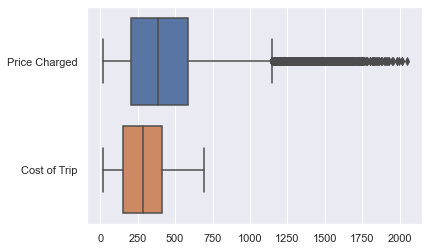

In [26]:

sns.boxplot(data = main_df[['Price Charged','Cost of Trip']], orient="h")
plt.show()

In [27]:
main_df['diff_charge_costoftrip'] = main_df['Price Charged'] -  main_df['Cost of Trip']
main_df.sort_values('diff_charge_costoftrip',ascending=False).head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip
96554,1126,Male,18,8825,10170615,Cash,05/05/2017,Yellow Cab,NEW YORK NY,46.80,2048.03,584.06,12.48,Friday,May,2017,05-2017,1463.97
12320,2041,Male,37,34732,10170640,Card,05/05/2017,Yellow Cab,NEW YORK NY,43.29,2016.70,571.43,13.20,Friday,May,2017,05-2017,1445.27
64435,1541,Female,64,27425,10170737,Cash,30/04/2017,Yellow Cab,NEW YORK NY,43.20,2013.95,580.61,13.44,Sunday,April,2017,04-2017,1433.34
250571,1372,Female,37,5574,10170519,Card,30/04/2017,Yellow Cab,NEW YORK NY,41.81,1981.05,556.91,13.32,Sunday,April,2017,04-2017,1424.14
20317,207,Male,25,11149,10170703,Cash,30/04/2017,Yellow Cab,NEW YORK NY,41.65,1918.14,509.80,12.24,Sunday,April,2017,04-2017,1408.34


#### Before jumping into any conclusion let's see wether holiday has any impact on pricing or demand

In [28]:
holiday = pd.read_csv('Datasets/Holiday.csv')
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     57 non-null     object
 1   Holiday  57 non-null     object
 2   WeekDay  57 non-null     object
 3   Month    57 non-null     int64 
 4   Day      57 non-null     int64 
 5   Year     57 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.8+ KB


In [29]:
main_df['holiday'] = main_df.Date.isin(holiday.Date)
main_df.holiday = main_df.holiday.astype(int)

In [30]:
main_df.head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0


In [31]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekends = ['Friday','Saturday','Sunday']
last_quarter=['October','November','December']

In [32]:
#Setting a color palette
colors = {'Pink Cab':'#f820De','Yellow Cab':'#ffc000'}

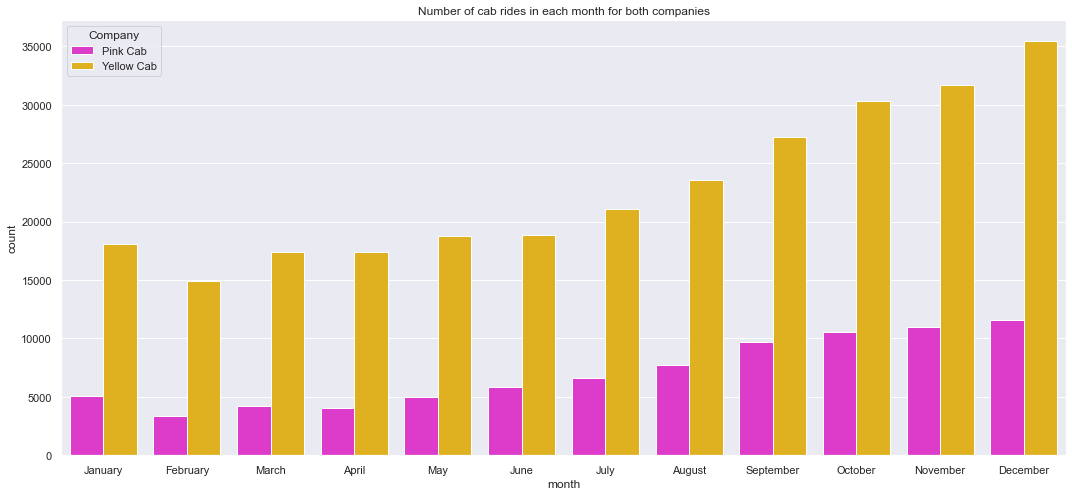

In [33]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each month for both companies')
sns.countplot(x='month',data=main_df,hue='Company',order=months,palette=colors)
plt.show()

In [34]:
PinkCab = main_df[main_df['Company']=='Pink Cab']
YellowCab = main_df[main_df['Company']=='Yellow Cab']

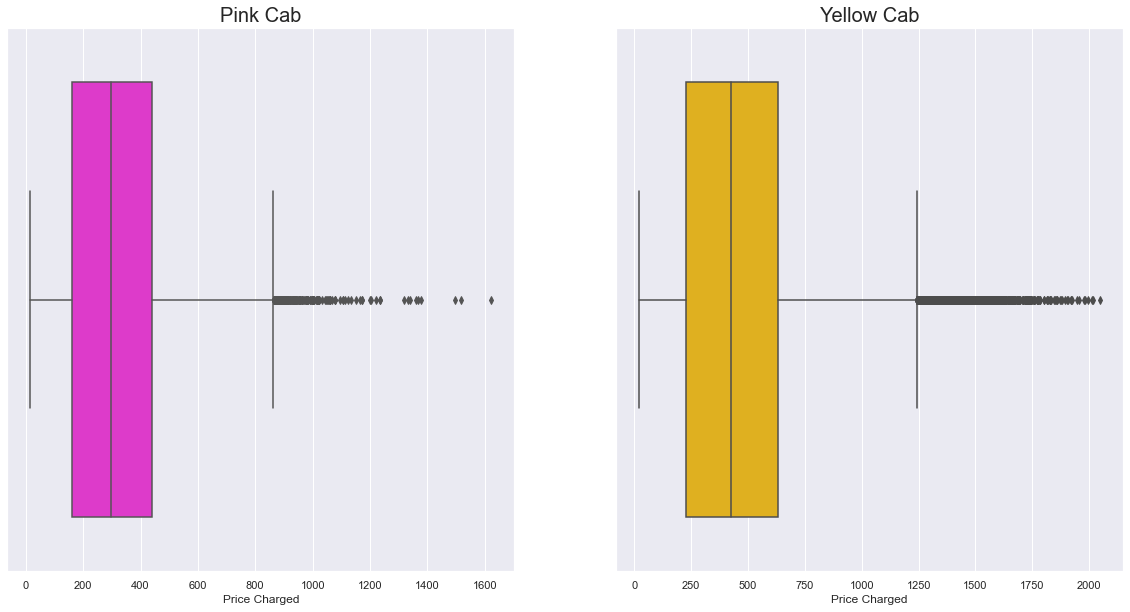

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(PinkCab['Price Charged'], ax=ax1,color=colors['Pink Cab'])
ax1.set_title('Pink Cab', fontsize=20)

sns.boxplot(YellowCab['Price Charged'], ax=ax2,color=colors['Yellow Cab'])
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

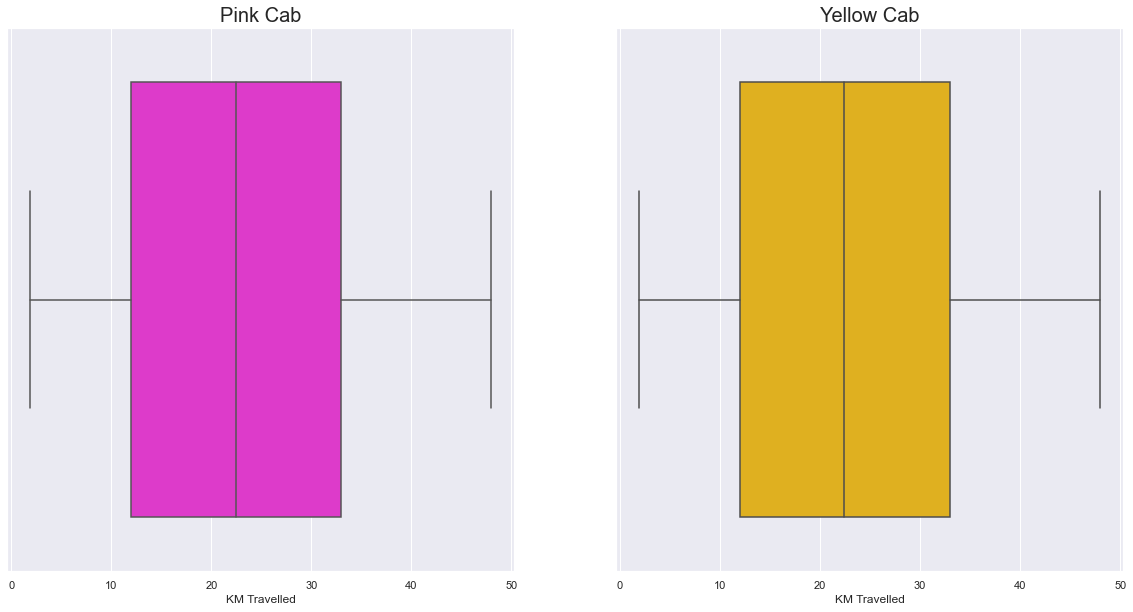

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(PinkCab['KM Travelled'], ax=ax1,color=colors['Pink Cab'])
ax1.set_title('Pink Cab', fontsize=20)

sns.boxplot(YellowCab['KM Travelled'], ax=ax2,color=colors['Yellow Cab'])
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

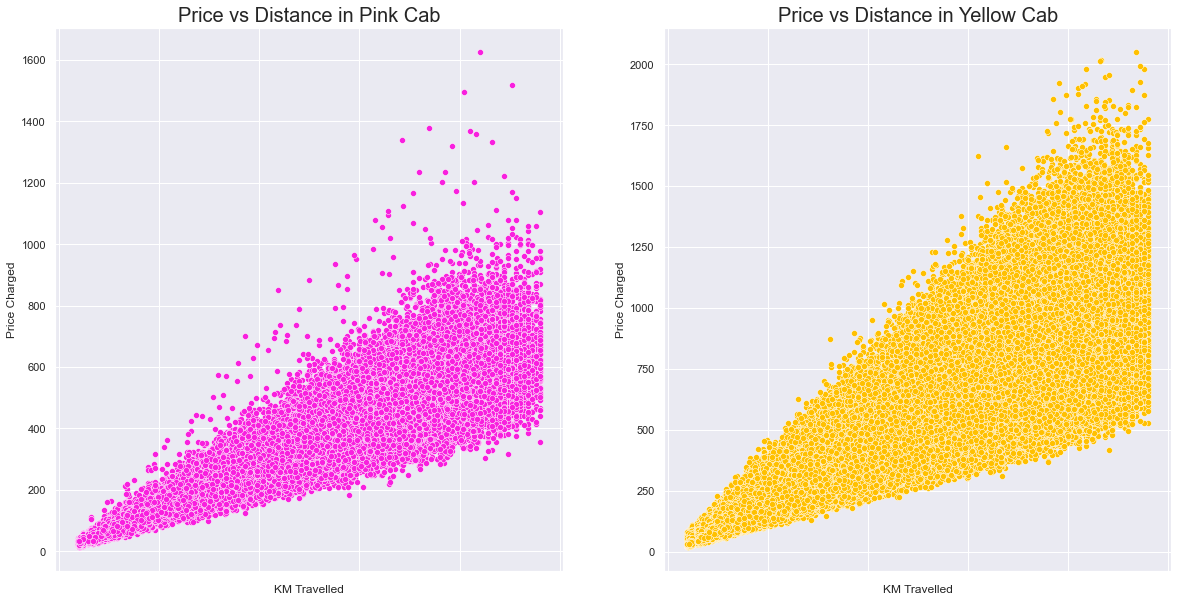

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.scatterplot(PinkCab['KM Travelled'], PinkCab['Price Charged'], ax=ax1,color=colors['Pink Cab'])
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM Travelled'], YellowCab['Price Charged'], ax=ax2,color=colors['Yellow Cab'])
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

This shows Price Charged and KM travelled are highly Co-rrelated.

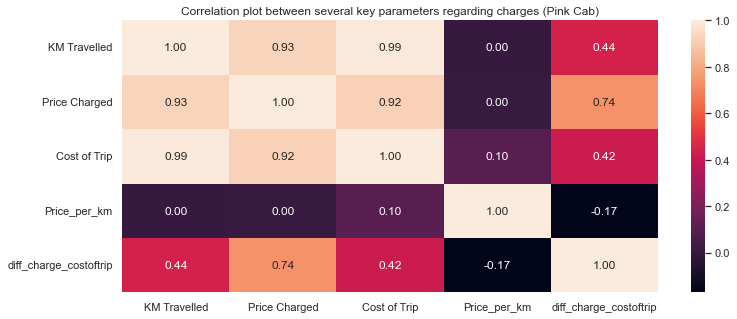

In [38]:
plt.figure(figsize=(12,5))
plt.title('Correlation plot between several key parameters regarding charges (Pink Cab)')
sns.heatmap(main_df[main_df['Company'] == 'Pink Cab'][['KM Travelled', 'Price Charged', 'Cost of Trip','Price_per_km','diff_charge_costoftrip']].corr(), annot=True,fmt='.2f')
plt.show()


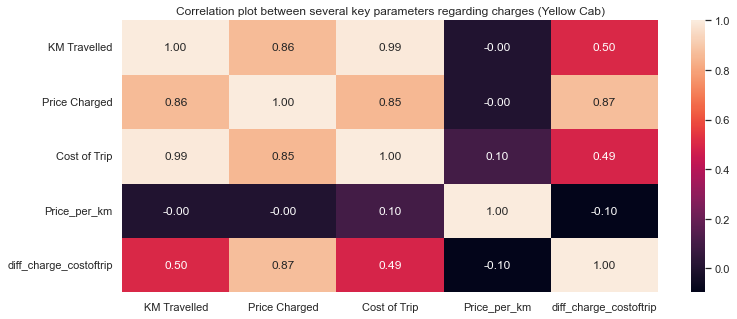

In [39]:
plt.figure(figsize=(12,5))
plt.title('Correlation plot between several key parameters regarding charges (Yellow Cab)')
sns.heatmap(main_df[main_df['Company'] == 'Yellow Cab'][['KM Travelled', 'Price Charged', 'Cost of Trip','Price_per_km','diff_charge_costoftrip']].corr(), annot=True,fmt='.2f')
plt.show()



There is strong positive correlation between KM Travelled, Price Charged and Cost of Trip, which is expected.

## Data Visualization

#### Defining Age Range

In [40]:
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
main_df['age_range'] = pd.cut(main_df.Age, bins, labels = labels,include_lowest = True)
main_df.head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0,20-29
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0,20-29
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0,20-29
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0,20-29
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0,20-29


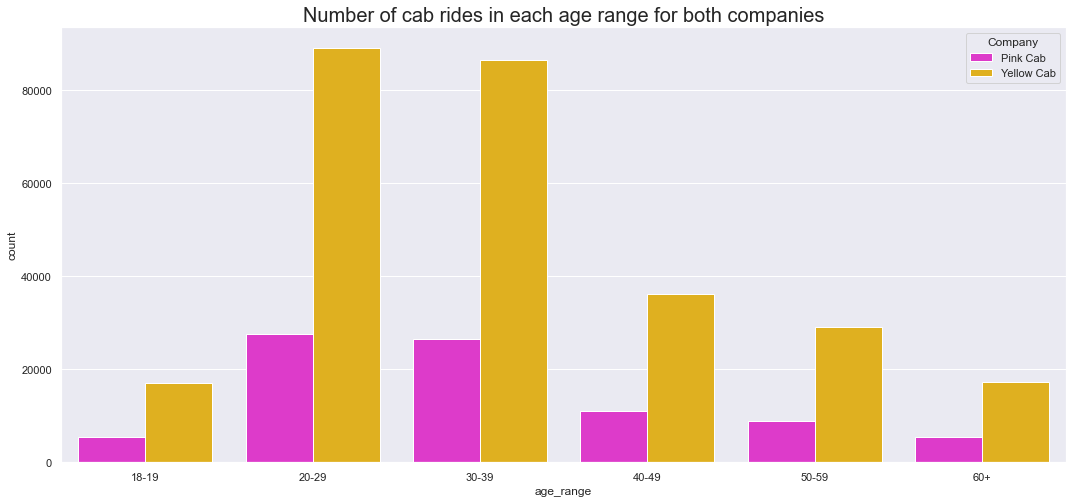

In [41]:
plt.figure(figsize=(18,8))
plt.title('Number of cab rides in each age range for both companies',size=20)
sns.countplot(x='age_range',data=main_df,hue='Company',palette=colors)
plt.show()

It is more likely for individuals between the ages of 20-40 to opt for a cab.

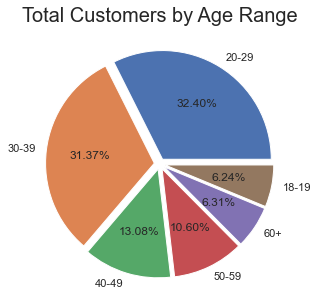

In [42]:
plt.figure(figsize=(5,5))
plt.pie(main_df['age_range'].value_counts(),labels = main_df['age_range'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*6)
plt.title("Total Customers by Age Range", fontsize=20)
plt.show()

### Definfing Distance Category

In [43]:
main_df['dist_category'] = pd.cut(main_df['KM Travelled'],bins=[main_df['KM Travelled'].min(),10,25,main_df['KM Travelled'].max()],labels=['Small Trip','Medium Trip','Long Trip'])
main_df.head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range,dist_category
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0,20-29,Long Trip
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0,20-29,Long Trip
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0,20-29,Long Trip
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0,20-29,Long Trip
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0,20-29,Long Trip


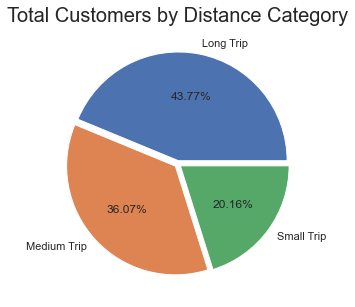

In [44]:
plt.figure(figsize=(5,5))
plt.pie(main_df['dist_category'].value_counts(),labels = main_df['dist_category'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.03]*3)
plt.title("Total Customers by Distance Category", fontsize=20)
plt.show()

### Definfing Income Category

In [45]:
main_df['income_cat'] = pd.cut(main_df['Income'],bins=[1006,3955,12235,main_df['Income'].max()],labels=['Lower-Middle','Upper-Middle','High'])
main_df.head()

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range,dist_category,income_cat
0,29290,Male,28,10813,10000011,Card,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.64,10.30,Friday,January,2016,01-2016,57.31,0,20-29,Long Trip,Upper-Middle
1,29290,Male,28,10813,10351127,Cash,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,12.12,Saturday,July,2018,07-2018,281.28,0,20-29,Long Trip,Upper-Middle
2,29290,Male,28,10813,10412921,Card,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,14.04,Friday,November,2018,11-2018,194.65,0,20-29,Long Trip,Upper-Middle
3,27703,Male,27,9237,10000012,Card,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,11.70,Wednesday,January,2016,01-2016,23.67,0,20-29,Long Trip,Upper-Middle
4,27703,Male,27,9237,10320494,Card,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,12.84,Saturday,April,2018,04-2018,253.98,0,20-29,Long Trip,Upper-Middle


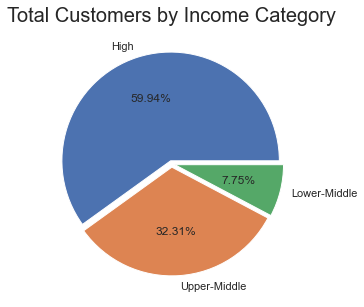

In [46]:
plt.figure(figsize=(5,5))
plt.pie(main_df['income_cat'].value_counts(),labels = main_df['income_cat'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.03]*3)
plt.title("Total Customers by Income Category", fontsize=20)
plt.show()

people generally prefer taking longer trips, while those with higher incomes tend to opt for cab rides.

### Price Comparison

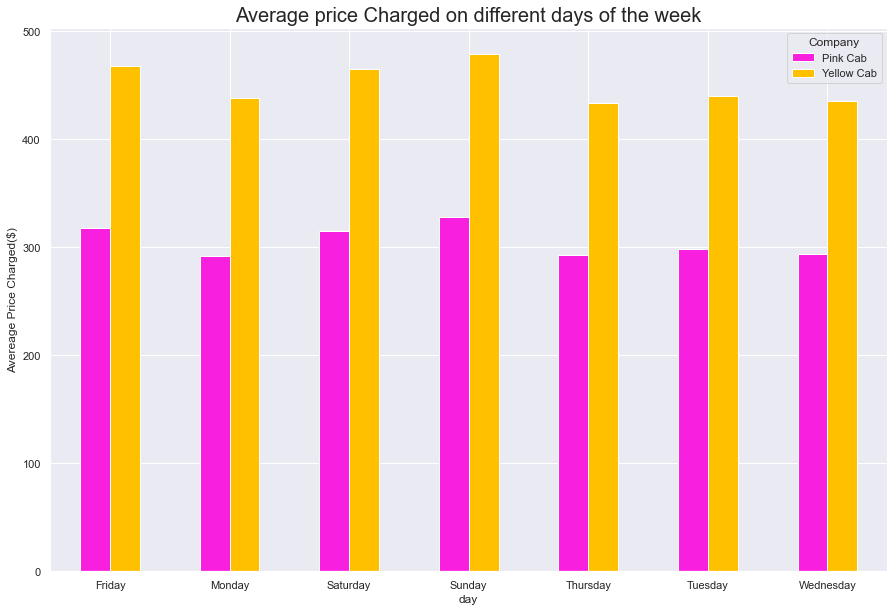

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
round(main_df.groupby(['day','Company'])['Price Charged'].mean().unstack(),2).plot.bar(ax=ax,color=colors)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.title('Average price Charged on different days of the week',size=20)
plt.ylabel("Avereage Price Charged($)")
plt.show()


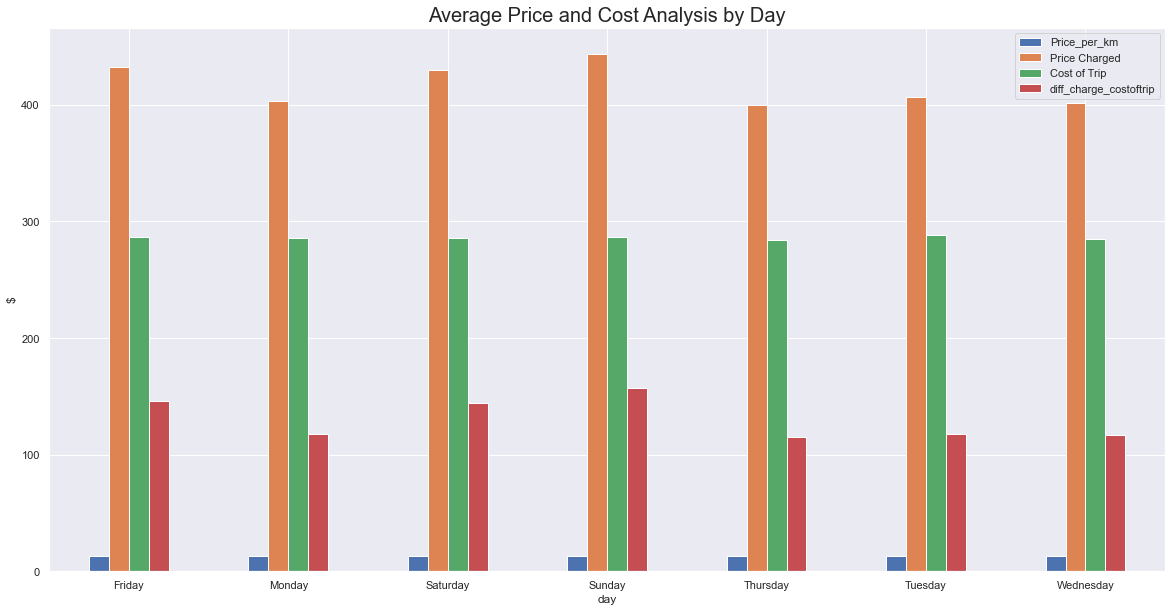

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
ax = round(main_df.set_index('day').loc[days].groupby(['day'])['Price_per_km','Price Charged','Cost of Trip','diff_charge_costoftrip'].mean(),2).plot.bar(ax=ax)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.title('Average Price and Cost Analysis by Day',size=20)
plt.ylabel('$')
plt.show()

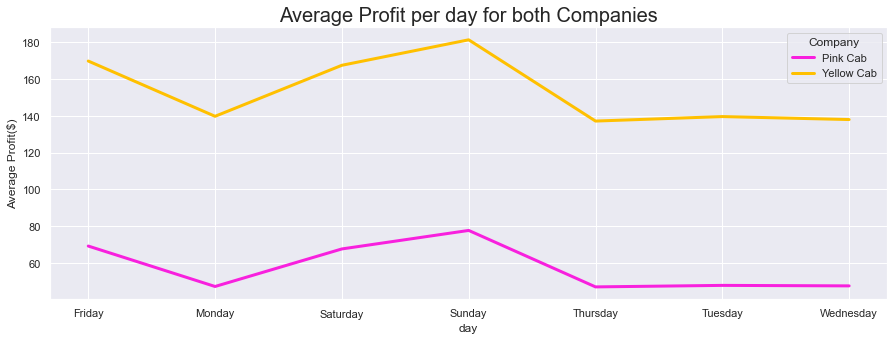

In [49]:
fig, ax = plt.subplots(figsize=(15,5))
main_df.groupby(['day', 'Company'])['diff_charge_costoftrip'].mean().unstack().plot.line(ax=ax,color=colors,linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.title('Average Profit per day for both Companies',size=20)
plt.ylabel('Average Profit($)')
plt.show()

Based on the graphs we have observed above, it appears that cab drivers tend to charge more during weekends, even if the price per kilometer remains the same throughout the week.

## City

In [50]:
main_df[main_df['City'] =='SAN FRANCISCO CA']

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range,dist_category,income_cat


In [51]:
city.drop(city[city['City'] ==  'SAN FRANCISCO CA'].index,inplace=True)

In [52]:
city.sort_values('City',inplace=True)
city.reset_index(inplace=True)
city.drop('index',axis=1,inplace=True)

YellowCab.drop_duplicates(['Customer ID'],inplace=True)
PinkCab.drop_duplicates(['Customer ID'],inplace=True)

In [53]:
city['yellow_users'] = pd.DataFrame(YellowCab.groupby('City')['Customer ID'].nunique()).reset_index()['Customer ID']
city['pink_users'] = pd.DataFrame(PinkCab.groupby('City')['Customer ID'].nunique()).reset_index()['Customer ID']
city['%yellow_cab'] = round((city['yellow_users'] / city['Users'])*100,2)
city['%pink_cab'] = round((city['pink_users'] / city['Users'])*100,2)

In [54]:
yellow_profit, pink_profit = [],[]
avg_yellow_profit, avg_pink_profit = [],[]
yellow_profit_holiday, pink_profit_holiday = [],[]
for  cities in city.City.unique():
    yellow_profit.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['City']==cities)]['diff_charge_costoftrip'].sum())
    pink_profit.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['City']==cities)]['diff_charge_costoftrip'].sum())

    avg_yellow_profit.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['City']==cities)]['diff_charge_costoftrip'].mean())
    avg_pink_profit.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['City']==cities)]['diff_charge_costoftrip'].mean())

    yellow_profit_holiday.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['holiday']==1)&(main_df['City']==cities)]['diff_charge_costoftrip'].sum())
    pink_profit_holiday.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['holiday']==1)&(main_df['City']==cities)]['diff_charge_costoftrip'].sum())

city['yellow_profit'] = yellow_profit
city['pink_profit'] =  pink_profit 

city['avg_yellow_profit'] = avg_yellow_profit
city['avg_pink_profit'] =  avg_pink_profit 

city['yellow_profit_holiday'] = yellow_profit_holiday
city['pink_profit_holiday'] = pink_profit_holiday


In [55]:
city.head()

,City,Population,Users,percentage_user,yellow_users,pink_users,%yellow_cab,%pink_cab,yellow_profit,pink_profit,avg_yellow_profit,avg_pink_profit,yellow_profit_holiday,pink_profit_holiday
0,ATLANTA GA,814885,24701,3.03,2595,1322,10.51,5.35,746382.57,96050.10,128.797682,54.511975,34310.82,6477.13
1,AUSTIN TX,698371,14978,2.14,1914,1354,12.78,9.04,379255.77,147445.08,125.249594,78.932056,22212.75,11042.96
2,BOSTON MA,248968,80021,32.14,2997,2463,3.75,3.08,1506717.26,262001.57,61.483606,50.520935,79436.40,18889.90
3,CHICAGO IL,1955130,164468,8.41,3000,2859,1.82,1.74,3068590.79,318722.42,64.924484,34.047903,166945.02,17498.66
4,DALLAS TX,942908,22157,2.35,2564,1118,11.57,5.05,1104003.21,24730.14,195.849425,17.920391,52898.74,111.80


In [56]:
df_melt = pd.melt(city, id_vars=['City','Population','percentage_user','Users','yellow_users','pink_users','avg_yellow_profit', 'avg_pink_profit','yellow_profit', 'pink_profit','yellow_profit_holiday', 'pink_profit_holiday'], var_name='variable', value_name='value')
df_melt.variable.unique()

array(['%yellow_cab', '%pink_cab'], dtype=object)

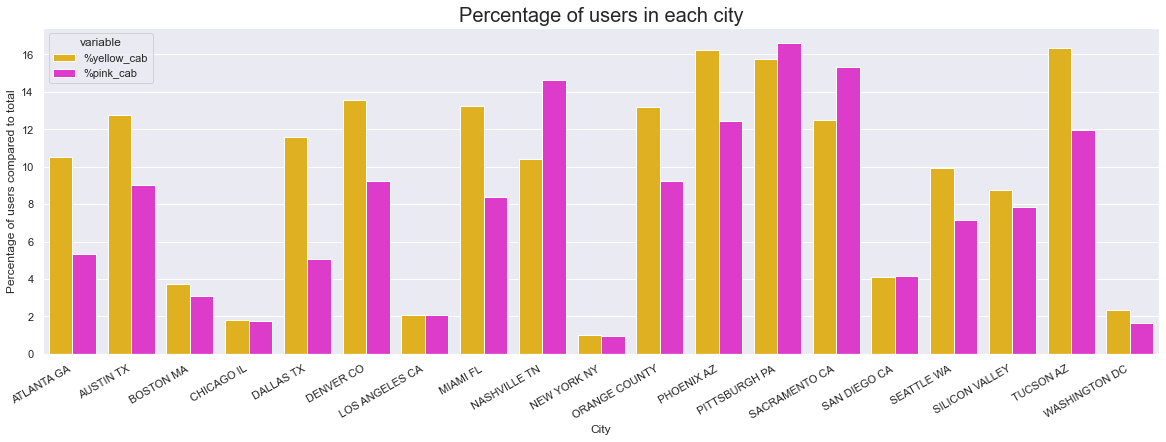

In [57]:
# Percentage of users compared to total users
plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_melt, x="City", y='value', hue='variable',palette={'%pink_cab':'#f820De','%yellow_cab':'#ffc000'})
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
plt.title("Percentage of users in each city", size=20)
plt.ylabel("Percentage of users compared to total")
plt.show()

In [58]:
print('Average user base covered by Yellow Cab:',round(city['%yellow_cab'].mean(),2),'%')
print('Average user base covered by Pink Cab:',round(city['%pink_cab'].mean(),2),'%')

Average user base covered by Yellow Cab: 9.46 %
Average user base covered by Pink Cab: 7.68 %


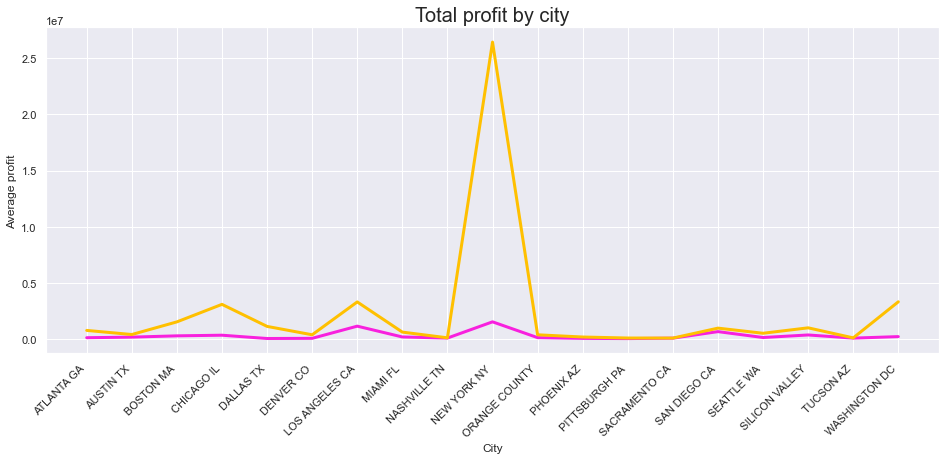

In [59]:
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=city, x='City', y='pink_profit', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

sns.lineplot(data=city, x='City', y='yellow_profit', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average profit')
plt.title('Total profit by city', size=20)
plt.show()



##### Except Boston and Washington, less than 10% of the population uses cabs.
##### In San Fransisco where 33.93% users cab no one uses either of yellow cab or pink cab. 
##### Out of the total cab users, Yellow Cab covers 9.46% while Pink Cab covers 7.68% of the market.
##### Yellow cabs generate the most profit in New York (NY) and there is a significant difference in the profits made by Pink cabs and Yellow cabs in NY.  

## Revenue

In [60]:
year_df = pd.DataFrame()
year_df['year'] =  [2016,2017,2018]
yellow_users, pink_users=[],[]
yellow_revenue, pink_revenue = [],[]
yellow_profit,pink_profit = [],[]
for year in year_df['year']:
    yellow_users.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['year']==year)]['Customer ID'].count())
    pink_users.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['year']==year)]['Customer ID'].count())
    yellow_revenue.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['year']==year)]['Price Charged'].sum())
    pink_revenue.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['year']==year)]['Price Charged'].sum())
    yellow_profit.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['year']==year)]['diff_charge_costoftrip'].sum())
    pink_profit.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['year']==year)]['diff_charge_costoftrip'].sum())
year_df['yellow_customers'] = yellow_users
year_df['pink_customers'] = pink_users
year_df['yellow_revenue'] = yellow_revenue
year_df['pink_revenue'] = pink_revenue
year_df['yellow_profit'] = yellow_profit
year_df['pink_profit'] = pink_profit
year_df['year'] = year_df['year'].astype(object)
year_df

,year,yellow_customers,pink_customers,yellow_revenue,pink_revenue,yellow_profit,pink_profit
0,2016,82239,25080,38481133.18,7908479.23,13926996.40,1713511.24
1,2017,98189,30321,45818910.04,9578629.54,16575977.40,2033655.03
2,2018,94253,29310,41553843.97,8841142.56,13517398.79,1560161.92


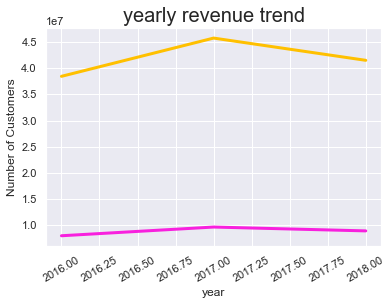

In [61]:
ax = sns.lineplot(data=year_df, x='year', y='pink_revenue', color=colors['Pink Cab'],linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
sns.lineplot(data=year_df, x='year', y='yellow_revenue', color=colors['Yellow Cab'],linewidth=3)
plt.ylabel('Number of Customers')
plt.title('yearly revenue trend',size=20)
plt.show()

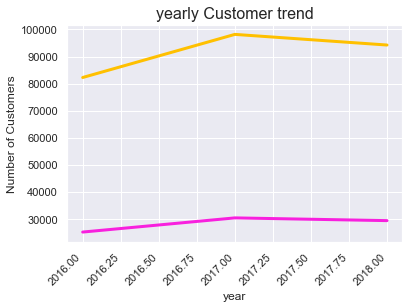

In [62]:
ax = sns.lineplot(data=year_df, x='year', y='pink_customers', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
sns.lineplot(data=year_df, x='year', y='yellow_customers', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Number of Customers')
plt.title('yearly Customer trend', size=16)
plt.show()

In [63]:
per_month_df = pd.DataFrame() 
per_month_df['month-year'] = ['01-2016','02-2016', '03-2016', '04-2016', '05-2016', '06-2016', '07-2016',
       '08-2016', '09-2016', '10-2016', '11-2016', '12-2016', 
       '01-2017', '02-2017', '03-2017', '04-2017', '05-2017', '06-2017',
       '07-2017', '08-2017', '09-2017', '10-2017', '11-2017', '12-2017',
       '01-2018', '02-2018', '03-2018', '04-2018', '05-2018', '06-2018',
       '07-2018', '08-2018', '09-2018', '10-2018', '11-2018', '12-2018']

In [64]:
yellow_users, pink_users=[],[]
yellow_revenue, pink_revenue = [],[]
yellow_profit,pink_profit = [],[]
for month in per_month_df['month-year']:
    yellow_users.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['Customer ID'].count())
    pink_users.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['Customer ID'].count())
    yellow_revenue.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['Price Charged'].sum())
    pink_revenue.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['Price Charged'].sum())
    yellow_profit.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['diff_charge_costoftrip'].sum())
    pink_profit.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['diff_charge_costoftrip'].sum())
per_month_df['yellow_customers'] = yellow_users
per_month_df['pink_customers'] = pink_users
per_month_df['yellow_revenue'] = yellow_revenue
per_month_df['pink_revenue'] = pink_revenue
per_month_df['yellow_profit'] = yellow_profit
per_month_df['pink_profit'] = pink_profit
per_month_df.head()

,month-year,yellow_customers,pink_customers,yellow_revenue,pink_revenue,yellow_profit,pink_profit
0,01-2016,3719,927,1952149.76,305236.77,836308.22,73952.93
1,02-2016,4674,1050,2398229.53,344521.86,1009169.34,87475.64
2,03-2016,5146,1231,2466879.72,394890.37,914765.22,87801.17
3,04-2016,5360,1240,2555847.12,383077.51,946136.40,82591.89
4,05-2016,5967,1567,3046277.53,447231.76,1282773.48,61550.80


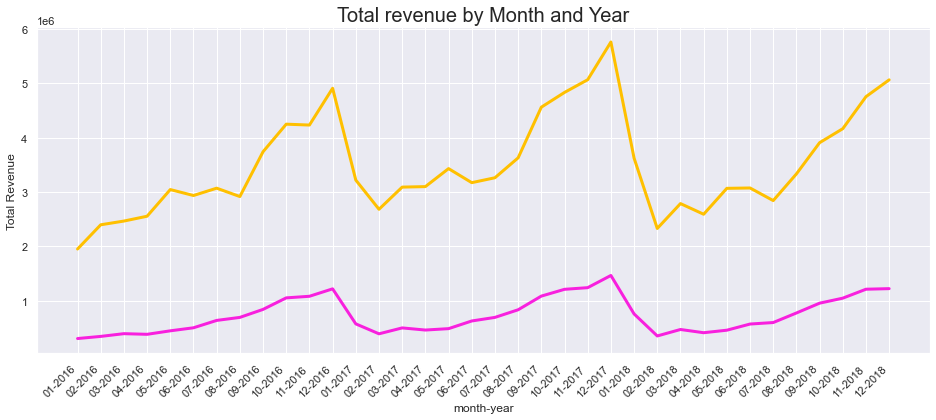

In [65]:
plt.figure(figsize=(16,6))
#Plot for pink cab customers
ax = sns.lineplot(data=per_month_df, x='month-year', y='pink_revenue', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
#Plot for yellow cab customers
sns.lineplot(data=per_month_df, x='month-year', y='yellow_revenue', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Total Revenue')
plt.title('Total revenue by Month and Year', size=20)
plt.show()

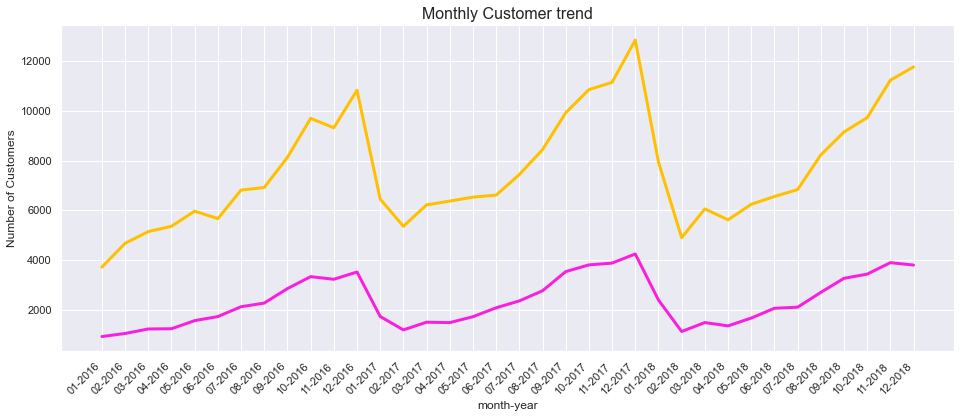

In [66]:
plt.figure(figsize=(16,6))
#Plot for pink cab customers
ax = sns.lineplot(data=per_month_df, x='month-year', y='pink_customers', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
#Plot for yellow cab customers
sns.lineplot(data=per_month_df, x='month-year', y='yellow_customers', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Number of Customers')
plt.title('Monthly Customer trend', size=16)
plt.show()

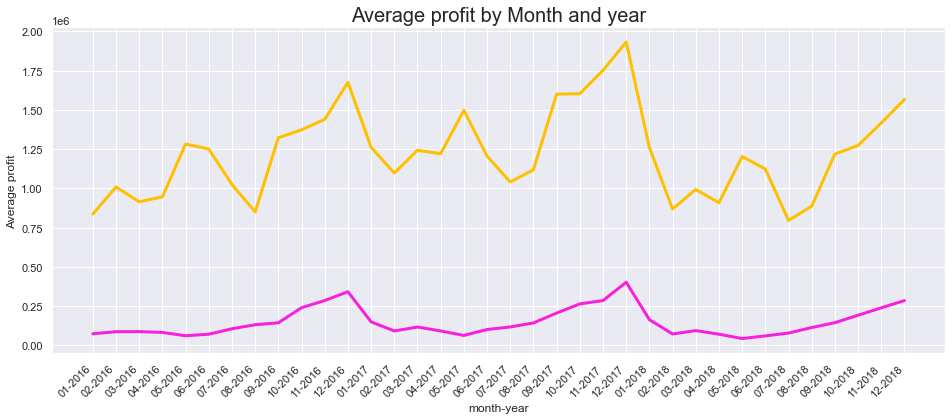

In [67]:
plt.figure(figsize=(16,6))
#Plot for pink cab customers
ax = sns.lineplot(data=per_month_df, x='month-year', y='pink_profit', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
#Plot for yellow cab customers
sns.lineplot(data=per_month_df, x='month-year', y='yellow_profit', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average profit')
plt.title('Average profit by Month and year', size=20)
plt.show()

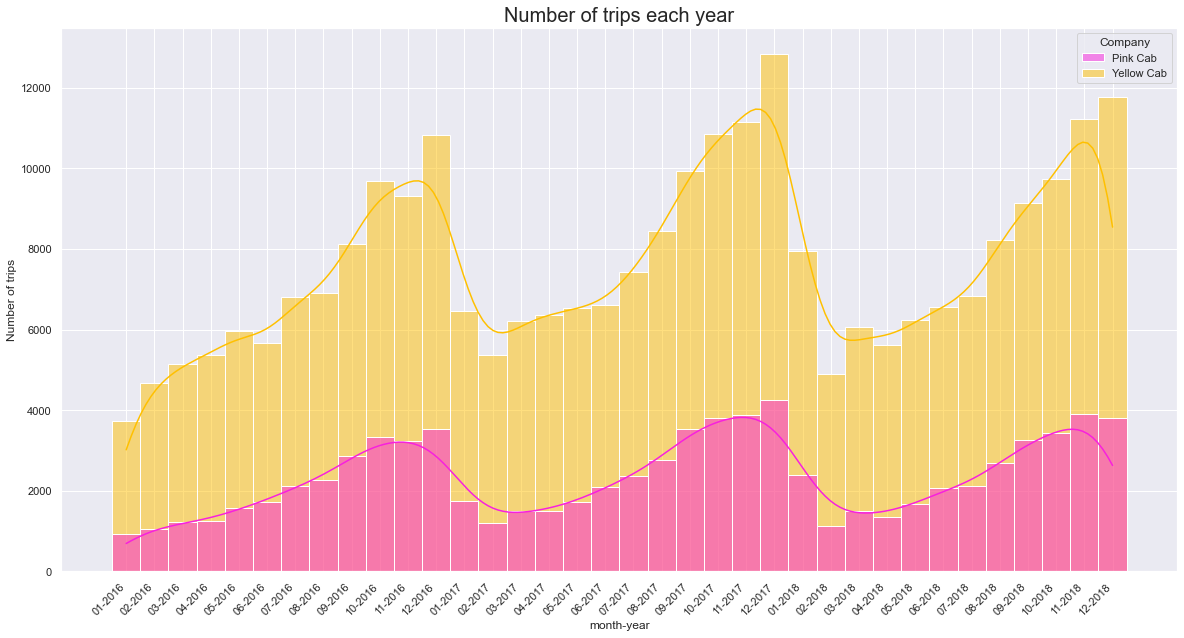

In [68]:
main_df['month-year'] = pd.Categorical(main_df['month-year'], per_month_df['month-year'])
#Checking number of trips on each year for each company
plt.figure(figsize=(20, 10))
ax = sns.histplot(data=main_df, x="month-year", hue="Company", kde=True, palette=colors)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.title("Number of trips each year", size=20)
plt.ylabel("Number of trips")
plt.show()

#### Both companies experienced a rise in revenue between 2016-17 but observed a decline in revenue from 2017-18. This could be explained by the corresponding trend in the number of users.

#### Since the number of trips tends to increase in the last quarter of the year, the profits and the number of trips also reach their peak in the final month of that year. However, they significantly decline in January of the following year.


### User Distribution

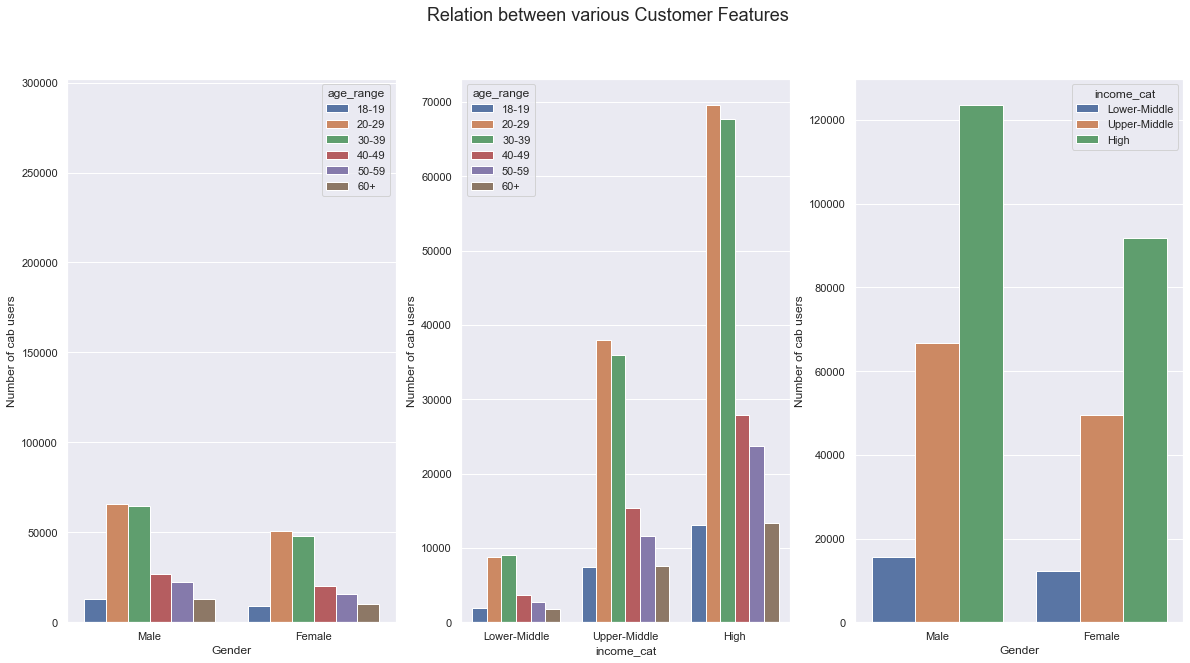

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

fig.suptitle('Relation between various Customer Features', size=18)
ax[0].set_ylim(0,city['Users'].max())
sns.countplot(data=main_df, x="Gender", hue='age_range', ax=ax[0])
sns.countplot(data=main_df, x="Gender", hue='income_cat', ax=ax[2])
sns.countplot(data=main_df, x="income_cat", hue='age_range', ax=ax[1])
ax[0].set_ylabel('Number of cab users')
ax[1].set_ylabel('Number of cab users')
ax[2].set_ylabel('Number of cab users')
plt.show()


##### In general, males and people with higher incomes tend to prefer taking a cab. 
#####  Specifically, males between the ages of 20-40 who fall into the high-income category are more likely to opt for a cab ride.

### Holiday

In [70]:
print('Average Price when there is a holiday', round(main_df[main_df.holiday == 1]['Price_per_km'].mean(),2))
print('Average Price when on a regular day', round(main_df[main_df.holiday == 0]['Price_per_km'].mean(),2))
print('Average Price when there is a holiday', round(main_df[(main_df.holiday == 1) & (main_df.day.isin(weekends)) ]['Price Charged'].mean(),2))
print('Average Price when on a regular day', round(main_df[main_df.holiday == 0]['Price Charged'].mean(),2))

Average Price when there is a holiday 12.67
Average Price when on a regular day 12.68
Average Price when there is a holiday 447.37
Average Price when on a regular day 423.21


In [71]:
holiday = main_df[main_df['holiday'] == 1].copy()
holiday

,Customer ID,Gender,Age,Income,Transaction ID,Payment_Mode,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Price_per_km,day,month,year,month-year,diff_charge_costoftrip,holiday,age_range,dist_category,income_cat
20,27318,Male,25,13984,10072285,Card,04/09/2016,Pink Cab,ATLANTA GA,45.20,539.01,479.12,10.60,Sunday,September,2016,09-2016,59.89,1,20-29,Long Trip,High
220,3077,Male,22,16759,10132943,Cash,31/12/2016,Yellow Cab,CHICAGO IL,31.80,470.19,457.92,14.40,Saturday,December,2016,12-2016,12.27,1,20-29,Long Trip,High
225,3077,Male,22,16759,10218252,Card,03/09/2017,Pink Cab,CHICAGO IL,18.81,200.94,189.98,10.10,Sunday,September,2017,09-2017,10.96,1,20-29,Medium Trip,High
226,3077,Male,22,16759,10254762,Card,11/11/2017,Yellow Cab,CHICAGO IL,7.28,110.92,92.60,12.72,Saturday,November,2017,11-2017,18.32,1,20-29,Small Trip,High
227,3077,Male,22,16759,10284447,Cash,24/12/2017,Pink Cab,CHICAGO IL,39.22,449.92,443.19,11.30,Sunday,December,2017,12-2017,6.73,1,20-29,Long Trip,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359373,23933,Male,27,2271,10439396,Card,01/01/2018,Yellow Cab,PHOENIX AZ,38.00,703.50,487.92,12.84,Monday,January,2018,01-2018,215.58,1,20-29,Long Trip,Lower-Middle
359377,50921,Male,33,18698,10439410,Card,31/12/2018,Yellow Cab,PITTSBURGH PA,4.04,81.05,52.84,13.08,Monday,December,2018,12-2018,28.21,1,30-39,Small Trip,High
359383,46512,Male,20,16996,10439419,Cash,31/12/2018,Yellow Cab,SACRAMENTO CA,32.67,469.42,466.53,14.28,Monday,December,2018,12-2018,2.89,1,20-29,Long Trip,High
359384,45772,Female,60,3169,10439423,Cash,01/01/2018,Yellow Cab,SACRAMENTO CA,35.70,498.31,462.67,12.96,Monday,January,2018,01-2018,35.64,1,60+,Long Trip,Lower-Middle


In [72]:

holiday_df = pd.DataFrame()
holiday_df['company'] = main_df.Company.unique()
holiday_revenue, nonholiday_revenue = [],[]
holiday_costoftrip, nonholiday_costoftrip = [],[]
holiday_profit, nonholiday_profit = [],[]
holiday_travelled, nonholiday_travelled = [],[]
holiday_priceperkm, nonholiday_priceperkm = [],[]

for company in holiday_df['company']:
    holiday_revenue.append(main_df[(main_df['Company']==company)&(main_df['holiday']==1)]['Price Charged'].mean())
    nonholiday_revenue.append(main_df[(main_df['Company']==company)&(main_df['holiday']==0)]['Price Charged'].mean())

    holiday_profit.append(main_df[(main_df['Company']==company)&(main_df['holiday']==1)]['diff_charge_costoftrip'].mean())
    nonholiday_profit.append(main_df[(main_df['Company']==company)&(main_df['holiday']==0)]['diff_charge_costoftrip'].mean())

    holiday_costoftrip.append(main_df[(main_df['Company']==company)&(main_df['holiday']==1)]['Cost of Trip'].mean())
    nonholiday_costoftrip.append(main_df[(main_df['Company']==company)&(main_df['holiday']==0)]['Cost of Trip'].mean())

    holiday_travelled.append(main_df[(main_df['Company']==company)&(main_df['holiday']==1)]['KM Travelled'].mean())
    nonholiday_travelled.append(main_df[(main_df['Company']==company)&(main_df['holiday']==0)]['KM Travelled'].mean())

    holiday_priceperkm.append(main_df[(main_df['Company']==company)&(main_df['holiday']==1)]['Price_per_km'].mean())
    nonholiday_priceperkm.append(main_df[(main_df['Company']==company)&(main_df['holiday']==0)]['Price_per_km'].mean())

holiday_df['holiday_travelled'] = holiday_travelled
holiday_df['nonholiday_travelled'] = nonholiday_travelled

holiday_df['holiday_priceperkm'] = holiday_priceperkm
holiday_df['nonholiday_priceperkm'] = nonholiday_priceperkm

holiday_df['holiday_revenue'] = holiday_revenue
holiday_df['nonholiday_revenue'] = nonholiday_revenue

holiday_df['holiday_costoftrip'] = holiday_costoftrip
holiday_df['nonholiday_costoftrip'] = nonholiday_costoftrip

holiday_df['holiday_profit'] = holiday_profit
holiday_df['nonholiday_profit'] = nonholiday_profit

holiday_df =  round(holiday_df,2)

In [73]:
holiday_df.head()

,company,holiday_travelled,nonholiday_travelled,holiday_priceperkm,nonholiday_priceperkm,holiday_revenue,nonholiday_revenue,holiday_costoftrip,nonholiday_costoftrip,holiday_profit,nonholiday_profit
0,Pink Cab,22.83,22.54,11.01,11.0,324.04,310.06,251.40,247.97,72.63,62.09
1,Yellow Cab,22.59,22.57,13.19,13.2,460.82,458.04,298.03,297.92,162.79,160.12


Pink Cab are tend to charge high during holidays. They have significant differnce in profit on Holidays and profit on regular days.

### Hypothesis Testing

#### 1. Does Gender affect profit made? 

##### H0: There is no significant difference in profit between the different gender categories. 
##### H1: There is a significant difference in profit between the different gender categories.

In [74]:
male = main_df[(main_df.Gender=='Male')].groupby('Transaction ID')['diff_charge_costoftrip'].mean()
female = main_df[(main_df.Gender=='Female')].groupby('Transaction ID')['diff_charge_costoftrip'].mean()

_, p_value = stats.ttest_ind(male.values,female.values,equal_var=True)

print('P value: ',round(p_value,3))
if p_value>0.05:
    print('Rejecting H0: There is no significant difference in profit between the different gender categories.')
else:
    print('Accepting H0: There is a significant difference in profit between the different gender categories.')

P value:  0.0
Accepting H0: There is a significant difference in profit between the different gender categories.


In [75]:
for company in main_df.Company.unique():
    male = main_df[(main_df.Gender=='Male')  & (main_df.Company == company)].groupby('Transaction ID')['diff_charge_costoftrip'].mean()
    female = main_df[(main_df.Gender=='Female') & (main_df.Company == company)].groupby('Transaction ID')['diff_charge_costoftrip'].mean()

    print('For', company)
    _, p_value = stats.ttest_ind(male.values,female.values,equal_var=True)

    if p_value>0.05:
        print('Rejecting H0: There is no significant difference in profit of ', company , 'between the different gender categories.')
    else:
        print('Accepting H0: There is a significant difference in of ', company , 'between the different gender categories.')

    print('__________________________________________________\n')


For Pink Cab
Rejecting H0: There is no significant difference in profit of  Pink Cab between the different gender categories.
__________________________________________________

For Yellow Cab
Accepting H0: There is a significant difference in of  Yellow Cab between the different gender categories.
__________________________________________________



#### 2. The cost of a trip is significantly higher during holiday periods than non-holiday periods?

##### H0: There is no significant difference in cost of Trip during holidays and regular days.
##### H1: There is a significant difference in cost of Trip during holidays and regular days.

In [76]:
holiday = main_df[main_df['holiday']==1].groupby('Transaction ID')['diff_charge_costoftrip'].mean()
non_holiday = main_df[main_df['holiday']==0].groupby('Transaction ID')['diff_charge_costoftrip'].mean()

_, p_value = stats.ttest_ind(holiday.values,non_holiday.values,equal_var=True)

print('P value: ',round(p_value,3))
if p_value>0.05:
    print('Rejecting H0: There is no significant difference in Profit during holidays and regular days.')
else:
    print('Accepting H0: There is a significant difference in Profit during holidays and regular days.')

P value:  0.001
Accepting H0: There is a significant difference in Profit during holidays and regular days.


In [77]:
for company in main_df.Company.unique():
    holiday = main_df[(main_df['holiday']==1) & (main_df.Company==company)].groupby('Transaction ID')['diff_charge_costoftrip'].mean()
    non_holiday = main_df[(main_df['holiday']==0) & (main_df.Company==company)].groupby('Transaction ID')['diff_charge_costoftrip'].mean()

    print('For', company)
    _, p_value = stats.ttest_ind(holiday.values,non_holiday.values,equal_var=True)

    if p_value>0.05:
        print('Rejecting H0: There is no significant difference in Profit for', company ,'during holidays and regular days.')
    else:
        print('Accepting H0: There is a significant difference in Profit for', company ,'during holidays and regular days.')
    
    print('__________________________________________________\n')

For Pink Cab
Accepting H0: There is a significant difference in Profit for Pink Cab during holidays and regular days.
__________________________________________________

For Yellow Cab
Rejecting H0: There is no significant difference in Profit for Yellow Cab during holidays and regular days.
__________________________________________________



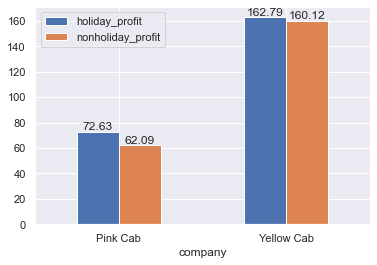

In [78]:
ax = holiday_df.plot.bar(y=['holiday_profit','nonholiday_profit'], x='company')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

#### 3. December Effect

##### H0: There is significant difference in Profit during december and normally.
##### H1: There is no significant difference in Profit during december and normally.

In [79]:
december_df = main_df[main_df['month']=='December']

In [80]:
december = december_df.groupby('Transaction ID')['diff_charge_costoftrip'].mean()
normally = main_df[main_df['month'] != 'December'].groupby('Transaction ID')['diff_charge_costoftrip'].mean()
_, p_value = stats.ttest_ind(december.values,normally.values,equal_var=True)

print('P value: ',round(p_value,3))
if p_value>0.05:
    print('Rejecting H0: There is no significant difference in Profit during december and normally.')
else:
    print('Accepting H0: There is significant difference in Profit during december and normally.')

P value:  0.0
Accepting H0: There is significant difference in Profit during december and normally.


In [81]:
for company in main_df.Company.unique():
    december = december_df[december_df.Company == company].groupby('Transaction ID')['diff_charge_costoftrip'].mean()
    non_holiday = main_df[(main_df['month'] != 'December') & (main_df.Company==company)].groupby('Transaction ID')['diff_charge_costoftrip'].mean()

    print('For', company)
    _, p_value = stats.ttest_ind(december.values,normally.values,equal_var=True)

    if p_value>0.05:
        print('Rejecting H0: There is no significant difference in Profit for', company, 'during december and normally.')
    else:
        print('Accepting H0: There is significant difference in Profit for', company, 'during december and normally.')
        
        print('__________________________________________________\n')

For Pink Cab
Accepting H0: There is significant difference in Profit for Pink Cab during december and normally.
__________________________________________________

For Yellow Cab
Accepting H0: There is significant difference in Profit for Yellow Cab during december and normally.
__________________________________________________



In [82]:

print('Average Profit by Yellow cab is :', round(main_df[(main_df['Company']=='Yellow Cab') & (main_df['month'] != 'December')]['diff_charge_costoftrip'].mean(),2))
print('Average Profit by Yellow cab in December is :', round(december_df[december_df['Company']=='Yellow Cab']['diff_charge_costoftrip'].mean(),2))
print('\n')
print('Average Profit by Pink cab is :', round(main_df[(main_df['Company']=='Pink Cab') & (main_df['month'] != 'December')]['diff_charge_costoftrip'].mean(),2))
print('Average Profit by Pink cab in December is :', round(december_df[december_df['Company']=='Pink Cab']['diff_charge_costoftrip'].mean(),2))

Average Profit by Yellow cab is : 162.37
Average Profit by Yellow cab in December is : 146.03


Average Profit by Pink cab is : 58.48
Average Profit by Pink cab in December is : 89.01


#### 4. Does the time of year affect the average price charged?

##### H0: The average Price per km is the same across different time of year.
##### H1: The average Price per Km varies significantly across different time of year.

In [83]:
test_list = []
for month_year in per_month_df['month-year']:
    group_df = main_df[(main_df['month-year'] == month_year)].groupby('Transaction ID')
    group = group_df['Price_per_km'].mean()
    test_list.append(group)

In [84]:
_, p_value = stats.f_oneway(*test_list)


print('P value: ',round(p_value,3))

if p_value>0.05:
    print('Accepting H0: The average Price per km is the same across different time of year.')
else:
    print('Rejecting H0: The average Price per Km varies significantly across different time of year.')

P value:  0.0
Rejecting H0: The average Price per Km varies significantly across different time of year.


In [85]:
avg_price_df = pd.DataFrame()
avg_price_df['month-year'] = per_month_df['month-year']
yellow_revenue, pink_revenue = [],[]
yellow_priceperkm,pink_priceperkm = [],[]
for month in avg_price_df['month-year']:
    yellow_revenue.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['Price Charged'].mean())
    pink_revenue.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['Price Charged'].mean())
    yellow_priceperkm.append(main_df[(main_df['Company']=='Yellow Cab')&(main_df['month-year']==month)]['Price_per_km'].mean())
    pink_priceperkm.append(main_df[(main_df['Company']=='Pink Cab')&(main_df['month-year']==month)]['Price_per_km'].mean())
avg_price_df['yellow_revenue'] = yellow_revenue
avg_price_df['pink_revenue'] = pink_revenue
avg_price_df['yellow_priceperkm'] = yellow_priceperkm
avg_price_df['pink_priceperkm'] = pink_priceperkm
avg_price_df.head()

,month-year,yellow_revenue,pink_revenue,yellow_priceperkm,pink_priceperkm
0,01-2016,524.912546,329.273754,13.196838,10.998598
1,02-2016,513.100028,328.116057,13.193504,10.972476
2,03-2016,479.378103,320.788278,13.209771,10.994151
3,04-2016,476.837149,308.933476,13.205104,10.971210
4,05-2016,510.520786,285.406356,13.203620,10.975112


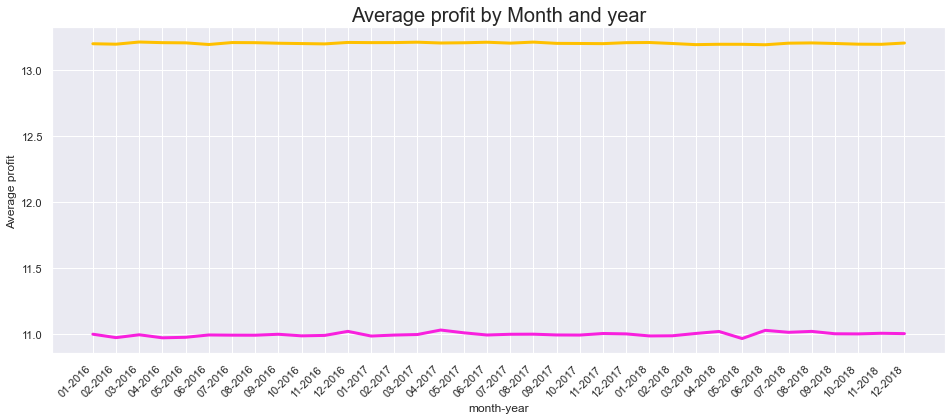

In [86]:
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=avg_price_df, x='month-year', y='pink_priceperkm', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

sns.lineplot(data=avg_price_df, x='month-year', y='yellow_priceperkm', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average profit')
plt.title('Average profit by Month and year', size=20)
plt.show()

In [87]:
## For Pink Cab

test_list = []
for month_year in per_month_df['month-year']:
    group_df = main_df[(main_df['month-year'] == month_year) & (main_df.Company == 'Pink Cab')].groupby('Transaction ID')
    group = group_df['Price_per_km'].mean()
    test_list.append(group)

_, p_value = stats.f_oneway(*test_list)


print('P value: ',round(p_value,3))

if p_value>0.05:
    print('Accepting H0: The average Price per km for Pink Cab is the same across different time of year.')
else:
    print('Rejecting H0: The average Price per Km varies for Pink Cab significantly across different time of year.')

P value:  0.274
Accepting H0: The average Price per km for Pink Cab is the same across different time of year.


In [88]:
## For Yellow Cab

test_list = []
for month_year in per_month_df['month-year']:
    group_df = main_df[(main_df['month-year'] == month_year) & (main_df.Company == 'Yellow Cab')].groupby('Transaction ID')
    group = group_df['Price_per_km'].mean()
    test_list.append(group)

_, p_value = stats.f_oneway(*test_list)


print('P value: ',round(p_value,3))

if p_value>0.05:
    print('Accepting H0: The average Price per km for Yellow Cab is the same across different time of year.')
else:
    print('Rejecting H0: The average Price per Km varies for Yellow Cab significantly across different time of year.')

P value:  0.998
Accepting H0: The average Price per km for Yellow Cab is the same across different time of year.


Average Price for individual Pink cab an Yellow cab across different time of year remains same but as soon as we see average price across the year after combining both cabs it changes significantly. 

#### 5. Does the time of year affect the average price charged?

##### H0: The average Price charged is the same across different time of year.
##### H1: The average Price charged varies significantly across different time of year.

In [89]:
test_list = []
for month_year in per_month_df['month-year']:
    group_df = main_df[main_df['month-year'] == month_year].groupby('Transaction ID')
    group = group_df['Price Charged'].mean()
    test_list.append(group)

In [90]:
_, p_value = stats.f_oneway(*test_list)


print('P value: ',round(p_value,3))

if p_value>0.05:
    print('Accepting H0: The average Price Charged is the same across different time of year.')
else:
    print('Rejecting H0: The average Price Charged varies significantly across different time of year.')

P value:  0.0
Rejecting H0: The average Price Charged varies significantly across different time of year.


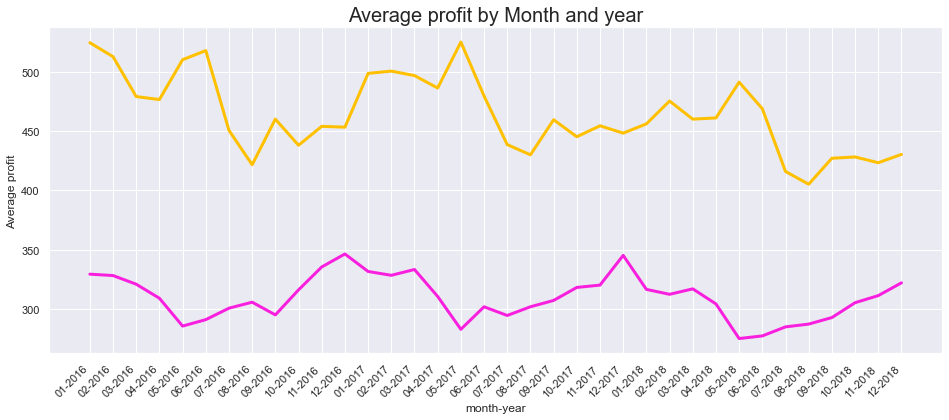

In [91]:
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=avg_price_df, x='month-year', y='pink_revenue', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

sns.lineplot(data=avg_price_df, x='month-year', y='yellow_revenue', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average profit')
plt.title('Average profit by Month and year', size=20)
plt.show()

#### 6. Does Average profit varies city wise?

##### H0: The average profit is the same across different cities.
##### H1: The average Profit varies significantly different cities.

In [92]:
test_list = []
for month_year in city['City']:
    group_df = main_df[main_df['City'] == month_year].groupby('Transaction ID')
    group = group_df['diff_charge_costoftrip'].mean()
    test_list.append(group)

In [93]:
_, p_value = stats.f_oneway(*test_list)


print('P value: ',round(p_value,3))

if p_value>0.05:
    print('Accepting H0: The average profit is the same across different city.')
else:
    print('Rejecting H0: The average Profit varies significantly different city.')

P value:  0.0
Rejecting H0: The average Profit varies significantly different city.


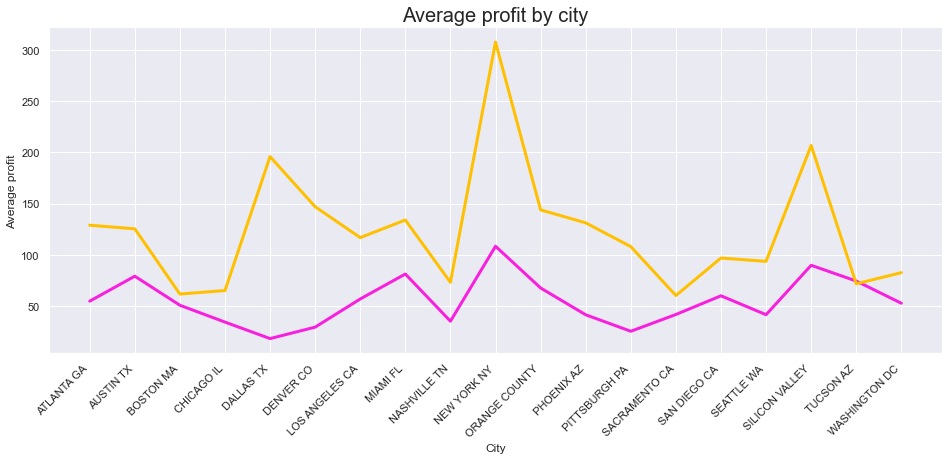

In [94]:
plt.figure(figsize=(16,6))

ax = sns.lineplot(data=city, x='City', y='avg_pink_profit', color=colors['Pink Cab'], linewidth=3)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

sns.lineplot(data=city, x='City', y='avg_yellow_profit', color=colors['Yellow Cab'], linewidth=3)
plt.ylabel('Average profit')
plt.title('Average profit by city', size=20)
plt.show()

In [95]:
city.head()

,City,Population,Users,percentage_user,yellow_users,pink_users,%yellow_cab,%pink_cab,yellow_profit,pink_profit,avg_yellow_profit,avg_pink_profit,yellow_profit_holiday,pink_profit_holiday
0,ATLANTA GA,814885,24701,3.03,2595,1322,10.51,5.35,746382.57,96050.10,128.797682,54.511975,34310.82,6477.13
1,AUSTIN TX,698371,14978,2.14,1914,1354,12.78,9.04,379255.77,147445.08,125.249594,78.932056,22212.75,11042.96
2,BOSTON MA,248968,80021,32.14,2997,2463,3.75,3.08,1506717.26,262001.57,61.483606,50.520935,79436.40,18889.90
3,CHICAGO IL,1955130,164468,8.41,3000,2859,1.82,1.74,3068590.79,318722.42,64.924484,34.047903,166945.02,17498.66
4,DALLAS TX,942908,22157,2.35,2564,1118,11.57,5.05,1104003.21,24730.14,195.849425,17.920391,52898.74,111.80


#### 7. Does Person from different income Categotry pays differnt average price per km?

##### H0: The average price per km is the same for each income category of customers.
##### H1: The average price per km varies significantly for each income category of customers.

In [96]:
test_list = []
for income_cat in main_df['income_cat'].unique():
    group_df = main_df[main_df['income_cat'] == income_cat].groupby('Transaction ID')
    group = group_df['Price_per_km'].mean()
    test_list.append(group)

In [97]:
_, p_value = stats.f_oneway(*test_list)


print('P value: ',round(p_value,3))

if p_value>0.05:
    print('Accepting H0: The average price per km is the same for each income category of customers.')
else:
    print('Rejecting H0: The average price per km varies significantly for each income category of customers.')

P value:  0.776
Accepting H0: The average price per km is the same for each income category of customers.
